# Aggressive or threatening wildlife reports in B.C. April 4 2014 - June 5, 2018
Each line refers to a call regarding aggressive or threatening wildlife to the Conservation Officer Service.
Data from BC Ministry of Environment.

Import analysis libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
wild = pd.read_excel(r"C:\Users\CARMANT\Documents\Reporter data projects\CBC\AggressiveThreatening_BearCougar_2014-2018_CLN.xlsx")

In [4]:
wild.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 13 columns):
Form                  4341 non-null object
IncidentNumber        4341 non-null object
IncidentTimeLogged    4341 non-null datetime64[ns]
Area                  4341 non-null object
District              4341 non-null object
OccurrenceRegion      4341 non-null object
City                  4079 non-null object
Zone                  4341 non-null object
IncidentDateTime      4341 non-null datetime64[ns]
Species               4341 non-null object
Attractants           4199 non-null object
NatureOfComplaint     4341 non-null object
ActionTaken           4268 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 441.0+ KB


In [5]:
wild.head()

,Form,IncidentNumber,IncidentTimeLogged,Area,District,OccurrenceRegion,City,Zone,IncidentDateTime,Species,Attractants,NatureOfComplaint,ActionTaken
0,PWOR,14-0409,2014-04-13 21:03:13,TOFINO,PORT ALBERNI,SOUTH COAST REGION,"TOFINO, BC",Central Island,2014-04-13 21:03:13,COUGAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO
1,PWOR,14-0413,2014-04-13 23:20:34,KIMBERLEY,CRANBROOK,SOUTHERN INTERIOR REGION,NaN,East Kootenay,2014-04-13 23:20:35,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO
2,PWOR,14-0672,2014-04-20 21:08:15,BURNABY,SURREY,SOUTH COAST REGION,NaN,Sea-to-Sky,2014-04-20 21:08:15,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,EMAILED CO
3,PWOR,14-0773,2014-04-22 17:28:48,MAPLE RIDGE,MAPLE RIDGE,SOUTH COAST REGION,"MAPLE RIDGE, BC",Fraser Valley,2014-04-22 17:28:48,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO
4,PWORUpdate,14-0868,2014-04-24 22:23:51,PRINCE GEORGE,PRINCE GEORGE,NORTHERN REGION,"PRINCE GEORGE, BC",Omineca,2014-04-24 22:23:51,BLACK BEAR,GARBAGE,AGGRESSIVE - PRESENT/RECENT,PHONED CO


Sometimes the same incident number is in the data more than once. In the "Form" column PWOR refers to an initial call and PWORUpdate refers to a related call about the same incident (e.g., someone calls about a bear, it goes away but then comes back later that day). The conservation officer service does not treat these as duplicates when referring to call volume so we won't either. 

In [6]:
wild["IncidentNumber"].value_counts().head(100)

16-25249    6
16-7559     5
17-8623     5
17-7853     4
14-4186     4
15-1368     4
15-6586     3
14-0838     3
14-0940     3
17-18646    3
14-16436    3
15-7195     3
16-7501     3
17-28860    3
17-26688    3
18-0095     3
17-11228    3
14-8281     3
14-6287     3
16-10666    3
16-9019     3
15-11452    3
15-9221     3
17-21186    3
16-5262     3
16-4251     3
15-10478    3
14-3448     3
16-5238     3
18-4559     3
           ..
15-10207    2
17-22439    2
15-9053     2
16-16669    2
16-6352     2
15-17955    2
17-11586    2
17-4145     2
17-17030    2
17-28086    2
18-1216     2
16-2610     2
14-12133    2
14-9493     2
15-18635    2
17-20859    2
16-7638     2
18-3128     2
17-10752    2
16-2245     2
16-23326    2
17-5984     2
16-4506     2
17-11745    2
16-16814    2
17-9736     2
16-0555     2
15-12607    2
17-25450    2
18-0131     2
Name: IncidentNumber, Length: 100, dtype: int64

Where were the most reports?

In [7]:
wild.Area.value_counts()

PRINCE GEORGE        191
COQUITLAM            153
KELOWNA               95
PORT COQUITLAM        93
POWELL RIVER          91
MAPLE RIDGE           87
WHISTLER              86
TRAIL                 85
CRANBROOK             84
SQUAMISH              74
SURREY                74
PENTICTON             71
KIMBERLEY             70
WEST VANCOUVER        68
KAMLOOPS              68
NORTH VANCOUVER       67
BURNABY               64
VANCOUVER             52
VERNON                52
QUESNEL               50
CAMPBELL RIVER        49
SOOKE                 49
PORT ALBERNI          48
NELSON                48
PORT MOODY            44
SECHELT               43
SMITHERS              42
FORT ST. JOHN         41
PEMBERTON             41
MISSION               37
                    ... 
MOBERLY LAKE           1
FINTRY                 1
WARDNER                1
VICTOR LAKE            1
QUATSINO               1
LIARD HOT SPRINGS      1
CROFTON                1
COLUMBIA VALLEY        1
BRIDGE LAKE            1


Which species were reported most often?

In [8]:
wild.Species.value_counts()

BLACK BEAR      2486
COYOTE           438
DEER             425
COUGAR           382
GRIZZLY BEAR     218
MOOSE             87
WOLF              83
RACOON            55
OTHER             48
ELK               34
FOX               18
RAPTOR            17
UNKNOWN           12
BOBCAT            12
BISON              7
RATTLESNAKE        6
LYNX               6
RIVER OTTER        3
WOLVERINE          3
WILD SHEEP         1
Name: Species, dtype: int64

What was the primary attractant?

In [9]:
wild.Attractants.value_counts()

NOT APPLICABLE                                                               2582
PETS                                                                          550
OTHER                                                                         279
GARBAGE                                                                       242
RESIDENTIAL - FRUIT TREES/BERRIES                                             153
LIVESTOCK                                                                     150
CAMPGROUND FOOD                                                                25
OTHER : PETS                                                                   22
LIVESTOCK FEED                                                                 20
COMPOST                                                                        19
WILDLIFE - HUNTER KILL                                                         16
RESIDENTIAL - VEGETABLE GARDEN                                                 15
FREEZER         

What were the nature of the complaints?

In [10]:
wild.NatureOfComplaint.value_counts()

AGGRESSIVE- NOT PRESENT        2769
AGGRESSIVE - PRESENT/RECENT    1396
HUMAN INJURY/DEATH              176
Name: NatureOfComplaint, dtype: int64

In [11]:
wild.ActionTaken.value_counts()

EMAILED CO           2725
PHONED CO            1496
REFERRED TO RCMP       23
NO ACTION TAKEN        18
ADVICE PROVIDED         5
REFERRED TO OTHER       1
Name: ActionTaken, dtype: int64

To see how many incidents were reported each year, a new column is needed to denote the year. The Ministry of Environment uses fiscal years to keep track of these reports. This is why the earliest data is from April. So fiscal year is a better measure than calendar year to track this, because otherwise 2014 is an incomplete year. 
Creating a fiscal year column.

In [12]:
wild['CalendarYear'] = wild['IncidentDateTime'].dt.year
wild['Month'] = wild.IncidentDateTime.dt.month
c = pd.to_numeric(wild['CalendarYear'])

In [13]:
wild.head()

,Form,IncidentNumber,IncidentTimeLogged,Area,District,OccurrenceRegion,City,Zone,IncidentDateTime,Species,Attractants,NatureOfComplaint,ActionTaken,CalendarYear,Month
0,PWOR,14-0409,2014-04-13 21:03:13,TOFINO,PORT ALBERNI,SOUTH COAST REGION,"TOFINO, BC",Central Island,2014-04-13 21:03:13,COUGAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4
1,PWOR,14-0413,2014-04-13 23:20:34,KIMBERLEY,CRANBROOK,SOUTHERN INTERIOR REGION,NaN,East Kootenay,2014-04-13 23:20:35,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4
2,PWOR,14-0672,2014-04-20 21:08:15,BURNABY,SURREY,SOUTH COAST REGION,NaN,Sea-to-Sky,2014-04-20 21:08:15,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,EMAILED CO,2014,4
3,PWOR,14-0773,2014-04-22 17:28:48,MAPLE RIDGE,MAPLE RIDGE,SOUTH COAST REGION,"MAPLE RIDGE, BC",Fraser Valley,2014-04-22 17:28:48,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4
4,PWORUpdate,14-0868,2014-04-24 22:23:51,PRINCE GEORGE,PRINCE GEORGE,NORTHERN REGION,"PRINCE GEORGE, BC",Omineca,2014-04-24 22:23:51,BLACK BEAR,GARBAGE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4


In [14]:
wild['FiscYr'] = np.where(wild['Month'] <= 3, c-1, c) 

In [15]:
wild['FiscYr'] = pd.to_datetime(wild['FiscYr'], format = '%Y')

In [16]:
wild.head()

,Form,IncidentNumber,IncidentTimeLogged,Area,District,OccurrenceRegion,City,Zone,IncidentDateTime,Species,Attractants,NatureOfComplaint,ActionTaken,CalendarYear,Month,FiscYr
0,PWOR,14-0409,2014-04-13 21:03:13,TOFINO,PORT ALBERNI,SOUTH COAST REGION,"TOFINO, BC",Central Island,2014-04-13 21:03:13,COUGAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4,2014-01-01
1,PWOR,14-0413,2014-04-13 23:20:34,KIMBERLEY,CRANBROOK,SOUTHERN INTERIOR REGION,NaN,East Kootenay,2014-04-13 23:20:35,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4,2014-01-01
2,PWOR,14-0672,2014-04-20 21:08:15,BURNABY,SURREY,SOUTH COAST REGION,NaN,Sea-to-Sky,2014-04-20 21:08:15,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,EMAILED CO,2014,4,2014-01-01
3,PWOR,14-0773,2014-04-22 17:28:48,MAPLE RIDGE,MAPLE RIDGE,SOUTH COAST REGION,"MAPLE RIDGE, BC",Fraser Valley,2014-04-22 17:28:48,BLACK BEAR,NOT APPLICABLE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4,2014-01-01
4,PWORUpdate,14-0868,2014-04-24 22:23:51,PRINCE GEORGE,PRINCE GEORGE,NORTHERN REGION,"PRINCE GEORGE, BC",Omineca,2014-04-24 22:23:51,BLACK BEAR,GARBAGE,AGGRESSIVE - PRESENT/RECENT,PHONED CO,2014,4,2014-01-01


The number of aggressive and threating wildlife reports by fiscal year.

In [17]:
incidents = wild.FiscYr.value_counts()
incidents.head()

2016-01-01    1314
2017-01-01    1220
2014-01-01     814
2015-01-01     762
2018-01-01     230
Name: FiscYr, dtype: int64

In [18]:
wild.Zone.value_counts()

West Kootenay                  406
Sea-to-Sky                     344
Omineca                        299
Metro Vancouver                284
Fraser North                   282
Sunshine Coast                 266
South Okanagan                 263
East Kootenay                  257
North Okanagan                 252
Cariboo-Chilcotin              210
South Island                   208
North Island                   198
Central Island                 168
Thompson-Fraser                166
Bulkley-Stikine                132
Columbia-Kootenay              128
North Peace                    102
North Coast                    100
Fraser South                    99
Fraser Valley                   78
South Peace                     60
Fraser River                    20
Haida Gwaii                     12
Bulkley-Lakes                    5
Atlin-Cassiar-Stiline            1
Fraser River : Fraser North      1
Name: Zone, dtype: int64

In [19]:
species = pd.pivot_table(wild, index="FiscYr", columns="Species", values="IncidentNumber", aggfunc=np.count_nonzero)
species.head(7)

Species,BISON,BLACK BEAR,BOBCAT,COUGAR,COYOTE,DEER,ELK,FOX,GRIZZLY BEAR,LYNX,MOOSE,OTHER,RACOON,RAPTOR,RATTLESNAKE,RIVER OTTER,UNKNOWN,WILD SHEEP,WOLF,WOLVERINE
FiscYr,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,646.0,NaN,111.0,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,594.0,NaN,118.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,6.0,600.0,7.0,105.0,167.0,211.0,18.0,5.0,60.0,1.0,40.0,19.0,19.0,8.0,5.0,1.0,1.0,1.0,39.0,1.0
2017-01-01,NaN,551.0,4.0,35.0,213.0,195.0,14.0,8.0,44.0,4.0,38.0,25.0,30.0,9.0,NaN,2.0,9.0,NaN,37.0,2.0
2018-01-01,1.0,94.0,1.0,13.0,58.0,19.0,2.0,5.0,7.0,1.0,9.0,4.0,6.0,NaN,1.0,NaN,2.0,NaN,7.0,NaN


There are no reports for species other than black bears, cougars and grizzly bears before 2016 in this data. Calls pertaining to other species pre-2016 were recorded by the Conservation Officer Service but not sent to the CBC. Therefore we are limiting our analysis to the 2016-17 and 2017-18 fiscal years. These are the only complete years we have call data for all species.

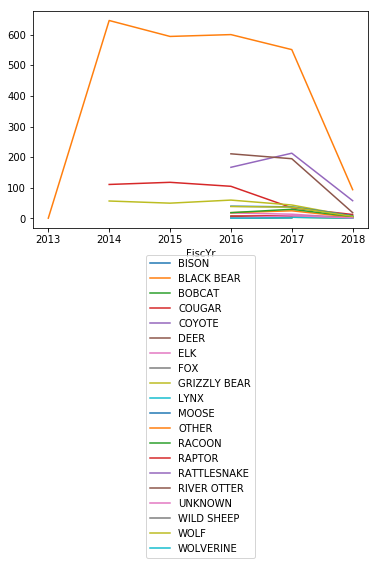

In [20]:
species.plot()
from matplotlib import pylab
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

Creating a new dataframe for only the 2016-17 and 2017-18 fiscal years. This is the one we will use for our analysis. There were 2,534 incidents reported over this time period.

In [21]:
df = wild[(wild.FiscYr == "2016-01-01") | (wild.FiscYr == "2017-01-01")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 1541 to 4141
Data columns (total 16 columns):
Form                  2534 non-null object
IncidentNumber        2534 non-null object
IncidentTimeLogged    2534 non-null datetime64[ns]
Area                  2534 non-null object
District              2534 non-null object
OccurrenceRegion      2534 non-null object
City                  2412 non-null object
Zone                  2534 non-null object
IncidentDateTime      2534 non-null datetime64[ns]
Species               2534 non-null object
Attractants           2453 non-null object
NatureOfComplaint     2534 non-null object
ActionTaken           2503 non-null object
CalendarYear          2534 non-null int64
Month                 2534 non-null int64
FiscYr                2534 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(11)
memory usage: 336.5+ KB


Almost half were calls related to black bears.

In [22]:
df.Species.value_counts()

BLACK BEAR      1151
DEER             406
COYOTE           380
COUGAR           140
GRIZZLY BEAR     104
MOOSE             78
WOLF              76
RACOON            49
OTHER             44
ELK               32
RAPTOR            17
FOX               13
BOBCAT            11
UNKNOWN           10
BISON              6
RATTLESNAKE        5
LYNX               5
WOLVERINE          3
RIVER OTTER        3
WILD SHEEP         1
Name: Species, dtype: int64

In [23]:
df.Area.value_counts()

PRINCE GEORGE                          98
COQUITLAM                              90
KELOWNA                                81
SURREY                                 68
CRANBROOK                              67
KIMBERLEY                              60
PENTICTON                              57
TRAIL                                  53
VANCOUVER                              50
MAPLE RIDGE                            49
WEST VANCOUVER                         49
KAMLOOPS                               45
PORT COQUITLAM                         45
SQUAMISH                               44
NORTH VANCOUVER                        42
POWELL RIVER                           36
BURNABY                                34
WHISTLER                               33
VERNON                                 32
PORT MOODY                             30
FORT ST. JOHN                          29
NELSON                                 29
CAMPBELL RIVER                         26
GIBSONS                           

## What were the most serious incidents?
Almost half involved bears and there were more calls related to injuries from racoons than cougars.

In [24]:
serious = df[df.NatureOfComplaint == "HUMAN INJURY/DEATH"]
serious.Species.value_counts()

BLACK BEAR      38
RACOON          17
COYOTE          16
GRIZZLY BEAR    15
DEER             9
WOLF             5
OTHER            4
RAPTOR           4
COUGAR           4
MOOSE            1
UNKNOWN          1
BOBCAT           1
Name: Species, dtype: int64

There were 115 serious incidents over the two years.

In [25]:
serious.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1645 to 4084
Data columns (total 16 columns):
Form                  115 non-null object
IncidentNumber        115 non-null object
IncidentTimeLogged    115 non-null datetime64[ns]
Area                  115 non-null object
District              115 non-null object
OccurrenceRegion      115 non-null object
City                  109 non-null object
Zone                  115 non-null object
IncidentDateTime      115 non-null datetime64[ns]
Species               115 non-null object
Attractants           106 non-null object
NatureOfComplaint     115 non-null object
ActionTaken           112 non-null object
CalendarYear          115 non-null int64
Month                 115 non-null int64
FiscYr                115 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(11)
memory usage: 15.3+ KB


In [26]:
serious.Area.value_counts()

VANCOUVER              11
SURREY                  8
COQUITLAM               6
MAPLE RIDGE             5
CRANBROOK               4
GOLDEN                  3
MERRITT                 3
MISSION                 3
PRINCE GEORGE           3
WEST VANCOUVER          3
PORT HARDY              3
VERNON                  2
VICTORIA                2
POWELL RIVER            2
SMITHERS                2
ELKFORD                 2
KITIMAT                 2
FORT ST. JAMES          2
FORT ST. JOHN           2
LANGLEY                 2
PRINCETON               2
RED ROCK                2
ATLIN                   2
FERNIE                  2
ABBOTSFORD              2
PUNTZI                  2
CHILLIWACK              1
BALFOUR                 1
BELCARRA                1
ELKO                    1
BURNABY                 1
SILVERTON               1
WHISTLER                1
BIG LAKE                1
KAMLOOPS                1
LINDELL BEACH           1
PENTICTON               1
SAANICH                 1
PROCTER     

In [27]:
serious.head(115)

,Form,IncidentNumber,IncidentTimeLogged,Area,District,OccurrenceRegion,City,Zone,IncidentDateTime,Species,Attractants,NatureOfComplaint,ActionTaken,CalendarYear,Month,FiscYr
1645,PWORUpdate,16-1211,2016-05-01 10:41:38,FORT ST. JOHN,FORT ST. JOHN,PEACE REGION,"FORT ST. JOHN, BC",North Peace,2016-05-01 10:41:38,MOOSE,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1670,PWOR,16-1550,2016-05-07 16:01:11,BELCARRA,MAPLE RIDGE,SOUTH COAST REGION,"BELCARRA, BC",Metro Vancouver,2016-05-07 16:01:11,BLACK BEAR,GARBAGE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1681,PWOR,16-1639,2016-05-09 10:37:47,VERNON,VERNON,OKANAGAN REGION,"VERNON, BC",North Okanagan,2016-05-09 10:37:47,BLACK BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1687,PWORUpdate,16-1550,2016-05-07 16:01:11,COQUITLAM,MAPLE RIDGE,SOUTH COAST REGION,"COQUITLAM, BC",Metro Vancouver,2016-05-07 16:01:11,BLACK BEAR,GARBAGE,HUMAN INJURY/DEATH,EMAILED CO,2016,5,2016-01-01
1704,PWOR,16-1942,2016-05-13 14:45:30,PUNTZI,WILLIAMS LAKE,Thompson Cariboo Region,"ALEXIX CREEK, BC",Cariboo-Chilcotin,2016-05-13 12:00:00,GRIZZLY BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1713,PWORUpdate,16-1942,2016-05-13 14:45:30,PUNTZI,WILLIAMS LAKE,Thompson Cariboo Region,NaN,Cariboo-Chilcotin,2016-05-13 12:00:00,GRIZZLY BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,EMAILED CO,2016,5,2016-01-01
1720,PWOR,16-2245,2016-05-17 16:20:48,PRINCE GEORGE,PRINCE GEORGE,OMINECA REGION,"PRINCE GEORGE, BC",Omineca,2016-05-17 16:20:48,BLACK BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1721,PWORUpdate,16-2245,2016-05-17 16:20:48,PRINCE GEORGE,PRINCE GEORGE,OMINECA REGION,"PRINCE GEORGE, BC",Omineca,2016-05-17 16:20:48,BLACK BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01
1766,PWOR,16-3001,2016-05-27 12:44:41,DAWSON CREEK,DAWSON CREEK,PEACE REGION,NaN,South Peace,2016-05-26 00:00:00,OTHER,NaN,HUMAN INJURY/DEATH,NaN,2016,5,2016-01-01
1785,PWOR,16-3283,2016-05-31 08:36:41,GOLDEN,GOLDEN,KOOTENAY BOUNDARY REGION,ELKFORD,Columbia-Kootenay,2016-05-22 08:45:00,GRIZZLY BEAR,NOT APPLICABLE,HUMAN INJURY/DEATH,PHONED CO,2016,5,2016-01-01


In [28]:
serious.groupby("Area").Species.value_counts()

Area             Species     
ABBOTSFORD       BLACK BEAR      1
                 RACOON          1
ANMORE           BLACK BEAR      1
ARMSTRONG        DEER            1
ASPEN GROVE      COUGAR          1
ATLIN            GRIZZLY BEAR    2
BALFOUR          BLACK BEAR      1
BELCARRA         BLACK BEAR      1
BIG LAKE         BLACK BEAR      1
BIG WHITE        WOLF            1
BURNABY          RAPTOR          1
CAMPBELL RIVER   GRIZZLY BEAR    1
CASTLEGAR        BLACK BEAR      1
CHILLIWACK       RACOON          1
COLUMBIA VALLEY  DEER            1
COQUITLAM        BLACK BEAR      4
                 COYOTE          1
                 RACOON          1
CRANBROOK        BLACK BEAR      2
                 DEER            1
                 GRIZZLY BEAR    1
DAWSON CREEK     OTHER           1
ELKFORD          COYOTE          2
ELKO             OTHER           1
FERNIE           BLACK BEAR      1
                 GRIZZLY BEAR    1
FORT ST. JAMES   COYOTE          2
FORT ST. JOHN    COYOTE  

In [29]:
serious.groupby("Species").Area.value_counts()

Species       Area               
BLACK BEAR    COQUITLAM              4
              MAPLE RIDGE            4
              MISSION                3
              WEST VANCOUVER         3
              CRANBROOK              2
              GOLDEN                 2
              POWELL RIVER           2
              PRINCE GEORGE          2
              VERNON                 2
              ABBOTSFORD             1
              ANMORE                 1
              BALFOUR                1
              BELCARRA               1
              BIG LAKE               1
              CASTLEGAR              1
              FERNIE                 1
              MERRITT                1
              PRINCETON              1
              PROCTER                1
              QUESNEL                1
              SOOKE                  1
              SQUAMISH               1
              TRAIL                  1
BOBCAT        MERRITT                1
COUGAR        PORT HARDY      

## Black bear calls
Assigning black bears their own dataframe.

In [30]:
black = df[df.Species == "BLACK BEAR"]
black.Area.value_counts()

PRINCE GEORGE                          63
COQUITLAM                              58
MAPLE RIDGE                            42
PORT COQUITLAM                         38
WHISTLER                               28
POWELL RIVER                           25
SQUAMISH                               25
TRAIL                                  24
NELSON                                 23
PORT MOODY                             22
REVELSTOKE                             21
CAMPBELL RIVER                         19
NORTH VANCOUVER                        19
QUESNEL                                18
WEST VANCOUVER                         18
KELOWNA                                18
VERNON                                 16
SECHELT                                15
PEMBERTON                              15
GIBSONS                                14
SOOKE                                  14
ROSSLAND                               14
FORT NELSON                            13
SMITHERS                          

In [31]:
black.Attractants.value_counts()

NOT APPLICABLE                               726
GARBAGE                                       92
OTHER                                         66
PETS                                          59
RESIDENTIAL - FRUIT TREES/BERRIES             53
LIVESTOCK                                     52
COMPOST                                        9
CAMPGROUND FOOD                                7
FREEZER                                        7
RESIDENTIAL - VEGETABLE GARDEN                 6
BIRD FEEDERS                                   6
COMMERCIAL û VINEYARDS/ORCHARD                 4
FREEZER : OTHER                                4
BEEHIVE                                        4
GARBAGE : LIVESTOCK                            4
GARBAGE : PETS                                 3
PET FOOD                                       3
FREEZER : GARBAGE                              3
GARBAGE : OTHER                                3
BARBEQUE                                       2
OTHER : PET FOOD    

In [32]:
garb = black[black.Attractants == "GARBAGE"]
garb.Area.value_counts()

COQUITLAM          7
PORT COQUITLAM     6
ROSSLAND           5
MAPLE RIDGE        4
QUESNEL            3
KELOWNA            3
PEACHLAND          3
NELSON             3
NORTH VANCOUVER    3
SQUAMISH           3
PRINCE GEORGE      3
NEW AIYANSH        2
WEST VANCOUVER     2
DUNCAN             2
TRAIL              2
VERNON             2
PORT MOODY         2
KAMLOOPS           2
BELCARRA           2
SALMO              1
BLUEBERRY CREEK    1
CRESTON            1
TLELL              1
INVERMERE          1
CASTLEGAR          1
KIMBERLEY          1
TERRACE            1
REVELSTOKE         1
TAPPEN             1
MERRITT            1
MISSION            1
PORT MCNEILL       1
ARMSTRONG          1
LANGFORD           1
BOWSER             1
PENTICTON          1
ABBOTSFORD         1
SUMMERLAND         1
LUND               1
PORT HARDY         1
SOOKE              1
HALFMOON BAY       1
BAMFIELD           1
SKOOKUMCHUCK       1
EGMONT             1
CHRISTINA LAKE     1
GOOD HOPE          1
ANMORE       

## Grizzly bear calls
Where were they?

In [33]:
griz = df[df.Species == "GRIZZLY BEAR"]
griz.Area.value_counts()

KITIMAT           7
BELLA COOLA       6
FERNIE            6
KINCOLITH         5
CHERRYVILLE       4
KINGCOME INLET    4
CASTLEGAR         3
NELSON            3
ELKFORD           3
TUMBLER RIDGE     3
ATLIN             3
GREENVILLE        3
CRANBROOK         3
MERRITT           2
SMITHERS          2
TACHET            2
PRINCE GEORGE     2
FORT ST. JOHN     2
PUNTZI            2
RIVERS INLET      2
GOLDEN            2
MACKENZIE         2
POWELL RIVER      2
SPARWOOD          2
HAGENSBORG        2
COOPER CREEK      2
VANDERHOOF        1
HUDSON'S HOPE     1
KELOWNA           1
TERRACE           1
MEADOW CREEK      1
WHISTLER          1
TATLAYOKO         1
TELKWA            1
CRESTON           1
HOUSTON           1
BLEWETT           1
HAZELTON          1
GLADE             1
JADE CITY         1
MCLEOD LAKE       1
CAMPBELL RIVER    1
LILLOOET          1
REVELSTOKE        1
YMIR              1
KITWANGA          1
WEST CRESTON      1
NIMPO LAKE        1
VERNON            1
SQUAMISH          1


What attracted them?

In [34]:
griz.Attractants.value_counts()

NOT APPLICABLE                       64
OTHER                                 9
LIVESTOCK                             7
RESIDENTIAL - FRUIT TREES/BERRIES     6
PETS                                  3
WILDLIFE - HUNTER KILL                1
LIVESTOCK : PETS                      1
COMMERCIAL û VINEYARDS/ORCHARD        1
CAMPGROUND FOOD                       1
Name: Attractants, dtype: int64

## Cougars
Where were the calls about cougars and what attracted them?

In [35]:
cougars = df[df.Species == "COUGAR"]
cougars.Area.value_counts()

KAMLOOPS                7
NANAIMO                 7
CAMPBELL RIVER          5
NORTH VANCOUVER         4
POWELL RIVER            4
PRINCETON               3
PORT HARDY              3
PORT ALBERNI            3
GIBSONS                 3
WILLIAMS LAKE           3
TRAIL                   3
COURTENAY               3
SOOKE                   3
MISSION                 3
LOGAN LAKE DISTRICT     3
DUNCAN                  3
PORT MCNEILL            2
HYDE CREEK              2
SLOCAN                  2
NELSON                  2
100 MILE HOUSE          2
YMIR                    2
WHITE ROCK              2
PARKSVILLE              2
RADIUM HOT SPRINGS      2
LONE BUTTE              2
FAIRMONT                2
HARRISON HOT SPRINGS    1
KRESTOVA                1
LOUIS CREEK             1
                       ..
PORT MOODY              1
VERNON                  1
HOPE                    1
BOWEN ISLAND            1
RIONDEL                 1
RIVERS INLET            1
ABBOTSFORD              1
OSOYOOS     

What attracted them?

In [36]:
cougars.Attractants.value_counts()

NOT APPLICABLE            92
PETS                      24
OTHER                      9
LIVESTOCK                  6
WILDLIFE - HUNTER KILL     2
OTHER : PETS               2
Name: Attractants, dtype: int64

## Coyotes
Twice as many reports from Surrey as from anywhere else.

In [37]:
coyotes = df[df.Species == "COYOTE"]
coyotes.Area.value_counts()

SURREY                              63
WEST VANCOUVER                      28
VANCOUVER                           28
TRAIL                               25
COQUITLAM                           25
KELOWNA                             19
RICHMOND                            16
BURNABY                             16
KAMLOOPS                            12
SQUAMISH                            10
WEST KELOWNA                        10
LANGLEY                             10
PRINCE GEORGE                        8
NORTH VANCOUVER                      7
PORT MOODY                           6
FORT ST. JAMES                       5
GIBSONS                              5
VERNON                               4
PORT COQUITLAM                       4
DELTA                                4
ABBOTSFORD                           4
LAKE COUNTRY DISTRICT (WINFIELD)     4
KEREMEOS                             3
HALFMOON BAY                         3
ELKFORD                              3
MACKENZIE                

Mainly attracted by pets

In [38]:
coyotes.Attractants.value_counts()

NOT APPLICABLE      176
PETS                161
OTHER                23
LIVESTOCK             7
GARBAGE               2
LIVESTOCK : PETS      1
Name: Attractants, dtype: int64

## Deer
The most calls about aggressive deer were from Cranbrook, Penticton, Kimberley and Kelowna.

In [39]:
deer = df[df.Species == "DEER"]
deer.Area.value_counts()

CRANBROOK              54
PENTICTON              47
KIMBERLEY              46
KELOWNA                38
VICTORIA               19
OAK BAY                11
KAMLOOPS               10
PRINCETON              10
SAANICH                 9
GRAND FORKS             9
WILLIAMS LAKE           9
VERNON                  8
CHILLIWACK              6
100 MILE HOUSE          5
PRINCE RUPERT           5
SILVERTON               5
MARYSVILLE              5
RADIUM HOT SPRINGS      5
SOOKE                   5
KALEDEN                 4
150 MILE HOUSE          4
ARMSTRONG               4
INVERMERE               4
OKANAGAN FALLS          4
MIDWAY                  3
BAYNES LAKE             3
ESQUIMALT               3
SPARWOOD                3
LUMBY                   2
ELKFORD                 2
                       ..
WASA                    1
COMOX                   1
BIG LAKE                1
DAWSON CREEK            1
GOLD CREEK              1
BARRIERE                1
OSOYOOS                 1
UCLUELET    

In [40]:
deer.Attractants.value_counts()

NOT APPLICABLE                       277
PETS                                  85
OTHER                                 21
OTHER : PETS                           6
RESIDENTIAL - FRUIT TREES/BERRIES      3
RESIDENTIAL - VEGETABLE GARDEN         2
PET FOOD                               2
Name: Attractants, dtype: int64

## Racoons
Most of the calls about aggressive racoons were from Vancouver, and Metro Vancouver. 
An interesting sidenote about racoons is that they even though they accounted for two per cent of overall calls to conservation officers, they accounted for 15 per cent of the serious incidents involving injuries.

In [41]:
coons = df[df.Species == "RACOON"]
coons.Area.value_counts()

VANCOUVER          13
NORTH VANCOUVER     8
COQUITLAM           3
MAPLE RIDGE         3
POWELL RIVER        2
PORT COQUITLAM      2
VICTORIA            2
ABBOTSFORD          2
SAANICH             1
OLIVER              1
RICHMOND            1
BURNABY             1
GIBSONS             1
NANOOSE BAY         1
WHISTLER            1
WEST KELOWNA        1
LANGFORD            1
KELOWNA             1
WEST VANCOUVER      1
CHILLIWACK          1
SURREY              1
LANGLEY             1
Name: Area, dtype: int64

In [42]:
coons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1661 to 4008
Data columns (total 16 columns):
Form                  49 non-null object
IncidentNumber        49 non-null object
IncidentTimeLogged    49 non-null datetime64[ns]
Area                  49 non-null object
District              49 non-null object
OccurrenceRegion      49 non-null object
City                  47 non-null object
Zone                  49 non-null object
IncidentDateTime      49 non-null datetime64[ns]
Species               49 non-null object
Attractants           47 non-null object
NatureOfComplaint     49 non-null object
ActionTaken           49 non-null object
CalendarYear          49 non-null int64
Month                 49 non-null int64
FiscYr                49 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(11)
memory usage: 6.5+ KB


In [43]:
coons.Attractants.value_counts()

NOT APPLICABLE                       27
PETS                                 17
OTHER                                 1
RESIDENTIAL - FRUIT TREES/BERRIES     1
OTHER : PETS                          1
Name: Attractants, dtype: int64

In [44]:
moose = df[df.Species == "MOOSE"]
moose.Area.value_counts()

FORT ST. JOHN    18
PRINCE GEORGE    14
DAWSON CREEK     11
FERNIE            9
SMITHERS          5
VANDERHOOF        4
FARMINGTON        2
BURNS LAKE        2
ROLLA             1
CHETWYND          1
CLEARWATER        1
WEST KELOWNA      1
NAKUSP            1
CHARLIE LAKE      1
KERSLEY           1
SALMON ARM        1
YMIR              1
KISPIOX           1
PRESPATOU         1
FORT FRASER       1
LAC LA JEUNE      1
Name: Area, dtype: int64

## River otters
Just because I'm curious.

All 3 complaints related to aggressive or threatening river otters were from the Nanaimo area. In two of the cases, they were attracted by pets. Somewhere here there is a great community news story.

In [45]:
df[df.Species == "RIVER OTTER"]

,Form,IncidentNumber,IncidentTimeLogged,Area,District,OccurrenceRegion,City,Zone,IncidentDateTime,Species,Attractants,NatureOfComplaint,ActionTaken,CalendarYear,Month,FiscYr
1801,PWOR,16-3501,2016-06-02 10:54:07,NANAIMO,NANAIMO,WEST COAST REGION,"NANAIMO, BC",Central Island,2016-06-02 10:54:07,RIVER OTTER,PETS,AGGRESSIVE- NOT PRESENT,EMAILED CO,2016,6,2016-01-01
3797,PWOR,17-21291,2017-10-10 09:16:24,NANAIMO,NANAIMO,WEST COAST REGION,"VICTORIA, BC",Central Island,2017-10-10 09:16:24,RIVER OTTER,PETS,AGGRESSIVE- NOT PRESENT,EMAILED CO,2017,10,2017-01-01
4092,PWOR,17-28630,2018-03-20 16:04:17,NANOOSE BAY,NANAIMO,WEST COAST REGION,"NANOOSE BAY, BC",Central Island,2018-03-20 16:04:17,RIVER OTTER,NOT APPLICABLE,AGGRESSIVE- NOT PRESENT,EMAILED CO,2018,3,2017-01-01


## Which animal generated the most calls in each city?

Vancouver

In [46]:
van = df[df.Area == "VANCOUVER"]
van.Species.value_counts()

COYOTE        28
RACOON        13
OTHER          5
BLACK BEAR     2
RAPTOR         1
LYNX           1
Name: Species, dtype: int64

Burnaby

In [47]:
bby = df[df.Area == "BURNABY"]
bby.Species.value_counts()

COYOTE        16
BLACK BEAR    10
RAPTOR         4
OTHER          2
RACOON         1
COUGAR         1
Name: Species, dtype: int64

Richmond

In [48]:
rich = df[df.Area == "RICHMOND"]
rich.Species.value_counts()

COYOTE     16
RACOON      1
WOLF        1
UNKNOWN     1
Name: Species, dtype: int64

Delta/Surrey/Langley

In [49]:
delta_sur_lang = df[(df.Area == "DELTA") | (df.Area == "SURREY") |(df.Area == "LANGLEY")]
delta_sur_lang.Species.value_counts()

COYOTE        77
RAPTOR         3
COUGAR         3
BLACK BEAR     2
RACOON         2
DEER           1
OTHER          1
BOBCAT         1
Name: Species, dtype: int64

North Shore

In [50]:
ns = df[(df.Area == "NORTH VANCOUVER") | (df.Area == "WEST VANCOUVER")]
ns.Species.value_counts()

BLACK BEAR    37
COYOTE        35
RACOON         9
COUGAR         4
OTHER          3
RAPTOR         2
WOLF           1
Name: Species, dtype: int64

Tri-Cities

In [51]:
tricit = df[(df.Area == "COQUITLAM") | (df.Area == "PORT COQUITLAM") | (df.Area == "PORT MOODY")]
tricit.Species.value_counts()

BLACK BEAR    118
COYOTE         35
RACOON          5
UNKNOWN         2
WOLF            1
DEER            1
RAPTOR          1
COUGAR          1
BOBCAT          1
Name: Species, dtype: int64

Tri-Cities black bears

In [52]:
tricit_black = tricit[tricit.Species == "BLACK BEAR"]
tricit_black.Attractants.value_counts()

NOT APPLICABLE                       91
GARBAGE                              15
OTHER                                 2
PETS                                  2
RESIDENTIAL - FRUIT TREES/BERRIES     2
FREEZER : OTHER                       1
RESIDENTIAL - VEGETABLE GARDEN        1
FREEZER : GARBAGE                     1
COMPOST                               1
FREEZER                               1
Name: Attractants, dtype: int64

Abbotsford/Chilliwack

In [53]:
valley = df[(df.Area == "ABBOTSFORD") | (df.Area == "CHILLIWACK")]
valley.Species.value_counts()

BLACK BEAR    6
COYOTE        4
RACOON        2
UNKNOWN       1
COUGAR        1
DEER          1
Name: Species, dtype: int64

Whistler/Squamish/Pemberton

In [54]:
sea_sky = df[(df.Area == "WHISTLER") | (df.Area == "SQUAMISH")| (df.Area == "PEMBERTON")]
sea_sky.Species.value_counts()

BLACK BEAR      68
COYOTE          11
WOLF             7
GRIZZLY BEAR     2
COUGAR           2
WOLVERINE        1
RACOON           1
Name: Species, dtype: int64

Whistler/Squamish/Pemberton black bears

In [55]:
sea_sky_black = sea_sky[sea_sky.Species == "BLACK BEAR"]
sea_sky_black.Attractants.value_counts()

NOT APPLICABLE                       45
OTHER                                 6
GARBAGE                               3
RESIDENTIAL - FRUIT TREES/BERRIES     3
PETS                                  3
GARBAGE : PETS                        2
COMPOST                               2
GARBAGE : OTHER                       1
LIVESTOCK                             1
BIRD FEEDERS                          1
Name: Attractants, dtype: int64

Maple Ridge

In [56]:
maprid = df[df.Area == "MAPLE RIDGE"]
maprid.Species.value_counts()

BLACK BEAR    42
RACOON         3
COYOTE         2
COUGAR         1
DEER           1
Name: Species, dtype: int64

Ucluelet/Tofino

In [57]:
ukee_tof = df[(df.Area == "UCLUELET") | (df.Area == "TOFINO")]
ukee_tof.Species.value_counts()

BLACK BEAR    12
WOLF          11
OTHER          1
DEER           1
Name: Species, dtype: int64

Greater Victoria

In [58]:
great_vic = df[(df.Area == "VICTORIA") | (df.Area == "SAANICH") | (df.Area == "SOOKE")|(df.Area == "OAK BAY") | (df.Area == "ESQUIMALT)") | (df.Area == "LANGFORD") | (df.Area == "COLWOOD") | (df.Area == "METCHOSIN") ]
great_vic.Species.value_counts()

DEER          44
BLACK BEAR    22
WOLF           4
RACOON         4
COUGAR         3
RAPTOR         2
OTHER          1
Name: Species, dtype: int64

Nanaimo

In [59]:
nan = df[df.Area == "NANAIMO"]
nan.Species.value_counts()

BLACK BEAR     9
COUGAR         7
RIVER OTTER    2
BOBCAT         1
Name: Species, dtype: int64

Prince George

In [60]:
pg = df[df.Area == "PRINCE GEORGE"]
pg.Species.value_counts()

BLACK BEAR      63
MOOSE           14
COYOTE           8
FOX              5
LYNX             2
OTHER            2
GRIZZLY BEAR     2
WOLF             1
COUGAR           1
Name: Species, dtype: int64

Prince George black bears

In [61]:
pg_black = pg[pg.Species == "BLACK BEAR"]
pg_black.Attractants.value_counts()

NOT APPLICABLE                       38
PETS                                  5
RESIDENTIAL - FRUIT TREES/BERRIES     5
OTHER                                 4
GARBAGE                               3
GARBAGE : LIVESTOCK                   1
BARBEQUE : PETS                       1
BEEHIVE                               1
BIRD FEEDERS                          1
RESIDENTIAL - VEGETABLE GARDEN        1
CAMPGROUND FOOD                       1
Name: Attractants, dtype: int64

Kamloops

In [62]:
kam = df[df.Area == "KAMLOOPS"]
kam.Species.value_counts()

COYOTE        12
BLACK BEAR    12
DEER          10
COUGAR         7
RAPTOR         2
WOLF           1
UNKNOWN        1
Name: Species, dtype: int64

Kelowna

In [63]:
kel = df[df.Area == "KELOWNA"]
kel.Species.value_counts()

DEER            38
COYOTE          19
BLACK BEAR      18
OTHER            2
WOLVERINE        1
GRIZZLY BEAR     1
RACOON           1
WOLF             1
Name: Species, dtype: int64

Penticton

In [64]:
pen = df[df.Area == "PENTICTON"]
pen.Species.value_counts()

DEER           47
BLACK BEAR      3
RATTLESNAKE     2
BOBCAT          2
WOLF            1
UNKNOWN         1
COUGAR          1
Name: Species, dtype: int64

Cranbrook

In [65]:
cran = df[df.Area == "CRANBROOK"]
cran.Species.value_counts()

DEER            54
ELK              4
BLACK BEAR       4
GRIZZLY BEAR     3
COYOTE           1
WOLVERINE        1
Name: Species, dtype: int64

Sunshine Coast

In [66]:
sun = df[(df.Area == "SECHELT") | (df.Area == "GIBSONS") | (df.Area == "POWELL RIVER")|(df.Area == "ROBERTS CREEK")]
sun.Species.value_counts()

BLACK BEAR      57
COUGAR           8
COYOTE           5
DEER             3
RACOON           3
GRIZZLY BEAR     2
WOLF             1
OTHER            1
Name: Species, dtype: int64

Sunshine Coast black bears

In [67]:
sun_black = sun[sun.Species == "BLACK BEAR"]
sun_black.Attractants.value_counts()

NOT APPLICABLE                       37
PETS                                  5
RESIDENTIAL - FRUIT TREES/BERRIES     4
OTHER                                 3
LIVESTOCK                             2
FREEZER : OTHER                       1
GARBAGE                               1
GARBAGE : OTHER                       1
COMPOST                               1
FREEZER                               1
Name: Attractants, dtype: int64

Prince Rupert

In [68]:
pr = df[df.Area == "PRINCE RUPERT"]
pr.Species.value_counts()

DEER          5
WOLF          4
BLACK BEAR    1
Name: Species, dtype: int64